## Assignment : 14

<pre>
1. You can work with preprocessed_data.csv for the assignment. You can get the data from - <a href='https://drive.google.com/drive/u/0/folders/1CJnItndeSSJu7aragQoXWZS9-0apN6pp'>Data folder </a>
2. Load the data in your notebook.
3. After step 2 you have to train 3 types of models as discussed below. 
4. For all the model use <a href='https://scikit-learn.org/stable/modules/model_evaluation.html#roc-metrics'>'auc'</a> as a metric. check <a  href='https://stackoverflow.com/a/46844409'>this</a> and <a  href='https://www.kaggle.com/c/santander-customer-transaction-prediction/discussion/80807'>this</a> for using auc as a metric 
5. You are free to choose any number of layers/hiddden units but you have to use same type of architectures shown below. 
6. You can use any one of the optimizers and choice of Learning rate and momentum.
7. For all the model's use <a href='https://www.youtube.com/watch?v=2U6Jl7oqRkM'>TensorBoard</a> and plot the Metric value and Loss with epoch. While submitting, take a screenshot of plots and include those images in a separate pad and write your observations about them.
8. Make sure that you are using GPU to train the given models.
</pre>

In [ ]:
#you can use gdown modules to import dataset for the assignment
#for importing any file from drive to Colab you can write the syntax as !gdown --id file_id
#you can run the below cell to import the required preprocessed data.csv file and glove vector

In [ ]:
!gdown --id 1GpATd_pM4mcnWWIs28-s1lgqdAg2Wdv-
!gdown --id 1pGd5tLwA30M7wkbJKdXHaae9tYVDICJ_

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1GpATd_pM4mcnWWIs28-s1lgqdAg2Wdv-
To: /content/preprocessed_data.csv
100% 124M/124M [00:00<00:00, 126MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1pGd5tLwA30M7wkbJKdXHaae9tYVDICJ_
To: /content/glove_vectors
100% 128M/128M [00:00<00:00, 155MB/s]


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import pdb

from keras.models import Sequential
from keras.layers import Embedding



In [ ]:
data = pd.read_csv("preprocessed_data.csv")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109248 entries, 0 to 109247
Data columns (total 9 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   school_state                                  109248 non-null  object 
 1   teacher_prefix                                109248 non-null  object 
 2   project_grade_category                        109248 non-null  object 
 3   teacher_number_of_previously_posted_projects  109248 non-null  int64  
 4   project_is_approved                           109248 non-null  int64  
 5   clean_categories                              109248 non-null  object 
 6   clean_subcategories                           109248 non-null  object 
 7   essay                                         109248 non-null  object 
 8   price                                         109248 non-null  float64
dtypes: float64(1), int64(2), object(6)
memory usage: 

In [ ]:
data.head(1)

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,1,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05


In [ ]:
# checking cardinality of categorical feature

data.school_state.unique(), data.school_state.unique().size

(array(['ca', 'ut', 'ga', 'wa', 'hi', 'il', 'oh', 'ky', 'sc', 'fl', 'mo',
        'mi', 'ny', 'va', 'md', 'tx', 'ms', 'nj', 'az', 'ok', 'pa', 'wv',
        'nc', 'co', 'dc', 'ma', 'id', 'al', 'me', 'tn', 'in', 'la', 'ct',
        'ar', 'ks', 'or', 'wi', 'ia', 'sd', 'ak', 'mn', 'nm', 'nv', 'mt',
        'ri', 'nh', 'wy', 'ne', 'de', 'nd', 'vt'], dtype=object), 51)

In [ ]:
data_target = data.project_is_approved
data_target[:2]

0    1
1    1
Name: project_is_approved, dtype: int64

In [ ]:
data = data.drop('project_is_approved', axis=1)
data.sample()

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,clean_categories,clean_subcategories,essay,price
18712,nc,mr,grades_3_5,0,history_civics literacy_language,civics_government literacy,the students school special many ways they cre...,5.25


## <font color='red'> Model-1 </font>
Build and Train deep neural network as shown below

<img src='https://i.imgur.com/w395Yk9.png'>
ref: https://i.imgur.com/w395Yk9.png

- __Input_seq_total_text_data__ --- You have to give Total text data columns. After this use the Embedding layer to get word vectors. Use given predefined glove word vectors, don't train any word vectors. After this use LSTM and get the LSTM output and Flatten that output. 
- __Input_school_state__ --- Give 'school_state' column as input to embedding layer and Train the Keras Embedding layer. 
- __Project_grade_category__  --- Give 'project_grade_category' column as input to embedding layer and Train the Keras Embedding layer.
- __Input_clean_categories__ --- Give 'input_clean_categories' column as input to embedding layer and Train the Keras Embedding layer.
- __Input_clean_subcategories__ --- Give 'input_clean_subcategories' column as input to embedding layer and Train the Keras Embedding layer.
- __Input_clean_subcategories__ --- Give 'input_teacher_prefix' column as input to embedding layer and Train the Keras Embedding layer.
- __Input_remaining_teacher_number_of_previously_posted_projects._resource_summary_contains_numerical_digits._price._quantity__ ---concatenate remaining columns and add a Dense layer after that. 



Below is an example of embedding layer for a categorical columns. In below code all are dummy values, we gave only for referance. 

how emebedding is working 
![image.png](attachment:image.png)
ref: https://keras.io/api/layers/core_layers/embedding/

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split

import tensorflow as tf
from keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder


from tensorflow.keras.preprocessing.text import Tokenizer
# from tensorflow.keras.utils import pad_sequences

from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Dense,Input,Conv2D,MaxPool2D,Activation,Dropout,Flatten,MaxPooling2D,LSTM
from tensorflow.keras.models import Model
from tensorflow.keras import layers

from sklearn.metrics import roc_auc_score
import tensorflow.keras.backend as K

from tensorflow.keras.callbacks import Callback

import pickle
import random as rn


In [ ]:
# example  of embedding

model = Sequential()
model.add(Embedding(5, 1, input_length=5))

input_array = np.random.randint(5, size=(1, 5))

model.compile('rmsprop', 'mse')

input_array = [[4,1,3,3,3]]
output_array = model.predict(input_array)
output_array

array([[[ 0.04779742],
        [ 0.01750464],
        [-0.01587401],
        [-0.01587401],
        [-0.01587401]]], dtype=float32)

 1. Go through this blog, if you have any doubt on using predefined Embedding values in Embedding layer - https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/
 2. Please go through this link https://keras.io/getting-started/functional-api-guide/ and check the 'Multi-input and multi-output models' then you will get to know how to give multiple inputs. 

# <font color='red'> Model-1 </font>

 ### train--cv--test Split your data.

In [ ]:
# 2. Split your data.

X,X_test,Y,y_test = train_test_split(data,data_target,test_size=.20, train_size=.8, stratify = data_target)
X_train,X_cv,y_train,y_cv = train_test_split(X,Y,test_size=.2, train_size=.8)

X.shape, X_train.shape, X_cv.shape

((87398, 8), (69918, 8), (17480, 8))

## 1.1 Text Vectorization

In [ ]:
#since the data is already preprocessed, we can directly move to vectorization part
#first we will vectorize the text data
#for vectorization of text data in deep learning we use tokenizer, you can go through below references
# https://www.kdnuggets.com/2020/03/tensorflow-keras-tokenization-text-data-prep.html
#https://stackoverflow.com/questions/51956000/what-does-keras-tokenizer-method-exactly-do
# after text vectorization you should get train_padded_docs and test_padded_docs

In [ ]:
X_train.essay

46090     my school urban district materials bought pock...
95757     our kids come high poverty area need many diff...
21848     i teach kindergarten low income high poverty a...
51990     students community eager excited learn each mo...
77771     the artists classroom living neighborhood high...
                                ...                        
20227     differentiating instruction important students...
103515    basic classroom supplies essential thriving le...
59878     students room frequently struggle able remain ...
3241      i three grade levels therefore i strive make b...
9556      my students wonderful little people they energ...
Name: essay, Length: 69918, dtype: object

In [ ]:

vocab_size =  50000 # hypertuning
oov_token = '<UNK>'
pad_type = 'post'
trunc_type = 'post'

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts(X_train.essay)
word_corpus = tokenizer.word_index

# Encode training data sentences into sequences
essay_sequences = tokenizer.texts_to_sequences(X_train.essay)
essay_sequences_cv = tokenizer.texts_to_sequences(X_cv.essay)
essay_sequences_te = tokenizer.texts_to_sequences(X_test.essay)

maxlen = max([len(x) for x in essay_sequences])
maxlen2 = max([len(x) for x in essay_sequences_cv])
maxlen3 = max([len(x) for x in essay_sequences_te])

# Pad the training sequences
text_padded = pad_sequences(essay_sequences, padding=pad_type, truncating=trunc_type, maxlen=maxlen)
text_padded_cv = pad_sequences(essay_sequences_cv, padding=pad_type, truncating=trunc_type, maxlen=maxlen)
text_padded_te = pad_sequences(essay_sequences_te, padding=pad_type, truncating=trunc_type, maxlen=maxlen)


In [ ]:
print(essay_sequences[0])
print(text_padded.shape)
# tokenizer.word_index

[5, 4, 473, 172, 43, 3012, 1855, 5, 2, 587, 1175, 445, 972, 6, 8, 6, 82, 685, 201, 365, 477, 2, 376, 39, 43, 10, 713, 2, 1722, 104, 61, 29, 2, 16, 590, 7, 1040, 4027, 676, 383, 323, 853, 4, 357, 721, 285, 2, 10, 67, 43, 1040, 170, 16, 126, 39, 227, 713, 2, 2206, 298, 7, 227, 19, 4990, 331, 1038, 47, 1489, 642, 1850, 227, 1214, 584, 2, 3772, 6, 572, 2627, 737, 1346, 5, 2, 19, 227, 572, 2242, 12, 209, 70, 263, 91, 2792, 13, 432, 1630, 2, 1083, 1241, 140, 160, 28, 3, 399, 54, 3, 2719, 1241, 160, 312, 2911, 1241, 753, 170, 1783, 1833, 2, 8, 6535, 262, 292, 2, 67, 96, 169, 677, 4, 14]
(69918, 339)


In [ ]:
# after getting the padded_docs you have to use predefined glove vectors to get 300 dim representation for each word
# we will be storing this data in form of an embedding matrix and will use it while defining our model
# Please go through following blog's 'Example of Using Pre-Trained GloVe Embedding' section to understand how to create embedding matrix
# https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/



In [ ]:
# load glove vectors


with open('glove_vectors', 'rb') as f:
    dict_glove_vectors = pickle.load(f)

print('Loaded %s word vectors.' % len(dict_glove_vectors))
f.close()

Loaded 51510 word vectors.


In [ ]:
vocab_size = len(tokenizer.word_index)+1 # 51671

# create a weight matrix for words in training docs
embedding_matrix = np.zeros((vocab_size, 300))

for word, i in tokenizer.word_index.items():
    embedding_vector = dict_glove_vectors.get(word)
    
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
        


In [ ]:
# 300-dim vector for all unique word in the corpus
embedding_matrix.shape

(47385, 300)

## 1.2 Categorical feature Vectorization

In [ ]:
# for model 1 and model 2, we have to assign a unique number to each feature in a particular categorical column.
# you can either use tokenizer,label encoder or ordinal encoder to perform the task
# label encoder gives an error for 'unseen values' (values present in test but not in train)
# handle unseen values with label encoder - https://stackoverflow.com/a/56876351
# ordinal encoder also gives error with unseen values but you can use modify handle_unknown parameter
# documentation of ordianl encoder https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html
# after categorical feature vectorization you will have column_train_data and column_test_data.


 **categorical feature** - school_state,  teacher_prefix, project_grade_category, clean_categories, clean_subcategories 
 

In [ ]:

# state cate
vocab_size = X_train.school_state.unique().size

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts(X_train.school_state)

# Encode data sentences into sequences
state_seq = tokenizer.texts_to_sequences(X_train.school_state)
state_seq_cv = tokenizer.texts_to_sequences(X_cv.school_state)
state_seq_te = tokenizer.texts_to_sequences(X_test.school_state)

# teacher_prefix
vocab_size = X_train.teacher_prefix.unique().size

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts(X_train.teacher_prefix)

# Encode data sentences into sequences
tea_seq = tokenizer.texts_to_sequences(X_train.teacher_prefix)
tea_seq_cv = tokenizer.texts_to_sequences(X_cv.teacher_prefix)
tea_seq_te = tokenizer.texts_to_sequences(X_test.teacher_prefix)


# state_seq,tea_seq, grade_seq, cate_seq, sub_cate_seqstate_seq
state_seq[0],tea_seq[0]

([26], [3])

In [ ]:
len(tea_seq_cv), 

(17480,)

defining class for handling unseen data in LabelEncoderExt

In [ ]:



class LabelEncoderExt(object):
    def __init__(self):
        """
        It differs from LabelEncoder by handling new classes and providing a value for it [Unknown]
        Unknown will be added in fit and transform will take care of new item. It gives unknown class id
        """
        self.label_encoder = LabelEncoder()
        # self.classes_ = self.label_encoder.classes_

    def fit(self, data_list):
        """
        This will fit the encoder for all the unique values and introduce unknown value
        :param data_list: A list of string
        :return: self
        """
        self.label_encoder = self.label_encoder.fit(list(data_list) + ['Unknown'])
        self.classes_ = self.label_encoder.classes_

        return self

    def transform(self, data_list):
        """
        This will transform the data_list to id list where the new values get assigned to Unknown class
        :param data_list:
        :return:
        """
        new_data_list = list(data_list)
        for unique_item in np.unique(data_list):
            if unique_item not in self.label_encoder.classes_:
                new_data_list = ['Unknown' if x==unique_item else x for x in new_data_list]

        return self.label_encoder.transform(new_data_list)



In [ ]:



# clean_categories

vocab_size = X_train.clean_categories.unique().size

Label_Encoder = LabelEncoderExt()
Label_Encoder.fit(X_train.clean_categories)
# Encode data sentences into sequences
cate_seq = Label_Encoder.transform(X_train.clean_categories)
cate_seq_cv = Label_Encoder.transform(X_cv.clean_categories)
cate_seq_te = Label_Encoder.transform(X_test.clean_categories)



# clean_subcategories

vocab_size = X_train.clean_subcategories.unique().size

Label_Encoder = LabelEncoderExt()
Label_Encoder.fit(X_train.clean_subcategories)
# Encode data sentences into sequences
sub_cate_seq = Label_Encoder.transform(X_train.clean_subcategories)
sub_cate_seq_cv = Label_Encoder.transform(X_cv.clean_subcategories)
sub_cate_seq_te = Label_Encoder.transform(X_test.clean_subcategories)


# project_grade_category

vocab_size = X_train.project_grade_category.unique().size

Label_Encoder = LabelEncoderExt()
Label_Encoder.fit(X_train.project_grade_category)

# Encode data sentences into sequences
grade_seq = Label_Encoder.transform(X_train.project_grade_category)
grade_seq_cv = Label_Encoder.transform(X_cv.project_grade_category)
grade_seq_te = Label_Encoder.transform(X_test.project_grade_category)




cate_seq[0], sub_cate_seq[0], grade_seq[0]

(47, 378, 4)

In [ ]:
cate_seq.shape, sub_cate_seq.shape, grade_seq.shape, cate_seq_cv.shape, sub_cate_seq_cv.shape, grade_seq_cv.shape, len(tea_seq_cv), sub_cate_seq_cv.shape



((69918,), (69918,), (69918,), (17480,), (17480,), (17480,), 17480, (17480,))

In [ ]:
column_train_data = pd.DataFrame({"state" : state_seq, "project_grade_cate": grade_seq, "input_cate":cate_seq, 
                                  "teacher_pre": tea_seq,"input_sub_cate": sub_cate_seq })
column_cv_data = pd.DataFrame({"state" : state_seq_cv, "project_grade_cate": grade_seq_cv, "input_cate":cate_seq_cv, 
                                  "teacher_pre": tea_seq_cv,"input_sub_cate": sub_cate_seq_cv })

column_test_data = pd.DataFrame({"state" : state_seq_te, "project_grade_cate": grade_seq_te, "input_cate":cate_seq_te, 
                                  "teacher_pre": tea_seq_te,"input_sub_cate": sub_cate_seq_te })



In [ ]:
# convert list to int
column_train_data["state"] = column_train_data["state"].apply(lambda x: x[0])
column_train_data["teacher_pre"] = column_train_data["teacher_pre"].apply(lambda x: x[0])

column_cv_data["state"] = column_cv_data["state"].apply(lambda x: x[0])
column_cv_data["teacher_pre"] = column_cv_data["teacher_pre"].apply(lambda x: x[0])

column_test_data["state"] = column_test_data["state"].apply(lambda x: x[0])
column_test_data["teacher_pre"] = column_test_data["teacher_pre"].apply(lambda x: x[0])

In [ ]:
column_train_data.head(5)

,state,project_grade_cate,input_cate,teacher_pre,input_sub_cate
0,26,4,47,3,378
1,2,3,9,3,259
2,5,4,9,2,278
3,9,4,25,2,307
4,4,4,49,2,380


In [ ]:
column_test_data.head()

,state,project_grade_cate,input_cate,teacher_pre,input_sub_cate
0,4,1,9,2,278
1,2,1,4,2,93
2,15,1,9,2,278
3,3,1,33,2,164
4,2,4,29,2,308


## 1.3 Numerical feature Vectorization

In [ ]:
# you have to standardise the numerical columns
# stack both the numerical features
#after numerical feature vectorization you will have numerical_data_train and numerical_data_test

In [ ]:


standardiser = StandardScaler().fit(X_train[['teacher_number_of_previously_posted_projects', 'price']])
numerical_data_train = standardiser.transform(X_train[['teacher_number_of_previously_posted_projects', 'price']])
numerical_data_cv = standardiser.transform(X_cv[['teacher_number_of_previously_posted_projects', 'price']])
numerical_data_test = standardiser.transform(X_test[['teacher_number_of_previously_posted_projects', 'price']])


In [ ]:
# convert array to df
numerical_data_train = pd.DataFrame(numerical_data_train, columns = ['teacher_number_of_previously_posted_projects', 'price'])
numerical_data_cv = pd.DataFrame(numerical_data_cv, columns = ['teacher_number_of_previously_posted_projects', 'price'])
numerical_data_test = pd.DataFrame(numerical_data_test, columns = ['teacher_number_of_previously_posted_projects', 'price'])


In [ ]:
x_tr_df = pd.concat((column_train_data,numerical_data_train), axis=1)
x_cv_df = pd.concat((column_cv_data,numerical_data_cv), axis=1)
x_te_df = pd.concat((column_test_data,numerical_data_test), axis=1)

In [ ]:
x_tr_df.shape, x_cv_df.shape, x_te_df.shape

((69918, 7), (17480, 7), (21850, 7))

In [ ]:
x_tr_df.sample()

,state,project_grade_cate,input_cate,teacher_pre,input_sub_cate,teacher_number_of_previously_posted_projects,price
48971,9,3,17,2,293,-0.398782,-0.574776


In [ ]:
numerical_data_train.sample()

,teacher_number_of_previously_posted_projects,price
19839,-0.327464,-0.560374


In [ ]:

y_train.shape



(69918,)

In [ ]:
#converting class labels to categorical variables
print("shape:",y_train.shape)

y_train = pd.get_dummies(y_train)
y_cv = pd.get_dummies(y_cv)
y_test = pd.get_dummies(y_test)

y_train.shape, y_cv.shape, y_test.shape

shape: (69918,)


((69918, 2), (17480, 2), (21850, 2))

In [ ]:
y_train.head(2)

,0,1
46090,0,1
95757,0,1


## 1.4 Defining the model

<img src='https://i.imgur.com/w395Yk9.png'>

save and load model:
![image.png](attachment:image.png)

In [ ]:
# as of now we have vectorized all our features now we will define our model.
# as it is clear from above image that the given model has multiple input layers and hence we have to use functional API
# Please go through - https://keras.io/guides/functional_api/
# it is a good programming practise to define your complete model i.e all inputs , intermediate and output layers at one place.
# while defining your model make sure that you use variable names while defining any length,dimension or size.
#for ex.- you should write the code as 'input_text = Input(shape=(pad_length,))' and not as 'input_text = Input(shape=(300,))'
# the embedding layer for text data should be non trainable
# the embedding layer for categorical data should be trainable
# https://stats.stackexchange.com/questions/270546/how-does-keras-embedding-layer-work
# https://towardsdatascience.com/deep-embeddings-for-categorical-variables-cat2vec-b05c8ab63ac0
#print model.summary() after you have defined the model
#plot the model using utils.plot_model module and make sure that it is similar to the above image

In [ ]:
#@title
len(word_corpus)+1

47385

In [ ]:
#@title
embedding_matrix.shape

(47385, 300)

In [ ]:
text_padded_cv.shape[1]

339

In [ ]:
# ref for multi input and output: https://keras.io/guides/functional_api/#:~:text=complex%20graph%20topologies-,Models%20with%20multiple%20inputs%20and%20outputs,-The%20functional%20API
tf.keras.backend.clear_session()
from tensorflow.keras.initializers import HeNormal as he_normal
from tensorflow.keras.regularizers import L2 as l2

total_text_input = Input(shape=(text_padded.shape[1],), name="total_text_input")  # Variable-length sequence of ints

state_input = Input(shape=(1,), name="state_input")  # Variable-length sequence of ints
grade_cate_input = Input(shape=(1,), name="grade_cate_input")  # Variable-length sequence of ints
cate_input = Input(shape=(1,), name="cate_input")  # Variable-length sequence of ints
sub_cate_input = Input(shape=(1,), name="sub_cate_input")  # Variable-length sequence of ints
tea_prefix_input = Input(shape=(1,), name="tea_prefix")  # Variable-length sequence of ints
posted_projects_wrt_teacher = Input(shape=(1,), name="posted_projects_wrt_teacher")


# Embed each word into a 300-dimensional vector
vocab_size = len(word_corpus)+1 # 51602+1

emd_text_data = layers.Embedding(vocab_size, 300, weights=[embedding_matrix],
                                  input_length=text_padded.shape[1], trainable=False, name='emd_text_data')(total_text_input)

# Embed each word into a 2-dimensional vector
vocab_size = column_train_data.state.unique().size+1
emd_state_data = layers.Embedding(vocab_size, 2, input_length = 1, name= 'emd_state_data')(state_input)

vocab_size = column_train_data.project_grade_cate.unique().size+1
emd_PGC_data = layers.Embedding(vocab_size, 2, input_length = 1, name= 'emd_PGC_data')(grade_cate_input)

vocab_size = column_train_data.input_cate.unique().size+1
emd_clean_cate_data = layers.Embedding(vocab_size, 2, input_length = 1, name= 'emd_clean_cate_data')(cate_input)

vocab_size = column_train_data.input_sub_cate.unique().size+1
emd_clean_subcate_data = layers.Embedding(vocab_size, 2, input_length = 1, name= 'emd_clean_subcate_data')(sub_cate_input)

vocab_size = column_train_data.teacher_pre.unique().size+1
emd_tea_prefix_data = layers.Embedding(vocab_size, 2, input_length = 1, name= 'emd_tea_prefix_data')(tea_prefix_input)


# Reduce sequence of embedded words in the title into a single 128-dimensional vector
x = tf.keras.layers.SpatialDropout1D(0.3)(emd_text_data)
lstm = layers.LSTM(128)(x)

#input 7 remaining inout
# input7 = Input(shape=(1,))
# x7 = Dense(16,kernel_initializer=he_normal(),kernel_regularizer=l2(0.0001))(input7)
# x7 = LeakyReLU()(x7)



# flatten
flaten_0 = Flatten()(lstm) 
flaten_1 = Flatten()(emd_state_data) 
flaten_2 = Flatten()(emd_PGC_data) 
flaten_3 = Flatten()(emd_clean_cate_data) 
flaten_4 = Flatten()(emd_clean_subcate_data) 
flaten_5 = Flatten()(emd_tea_prefix_data) 

# dense
dense_for_rme_input = Dense(25, kernel_initializer=he_normal())(posted_projects_wrt_teacher)

# Merge all available features into a single large vector via concatenation
x = layers.concatenate([flaten_0, flaten_1, flaten_2, flaten_3, flaten_4, flaten_5, dense_for_rme_input])

dense_after_conv = Dense(120, kernel_initializer=he_normal(), kernel_regularizer=l2(0.0001))(x)

dropout_1 = Dropout(0.5)(dense_after_conv)

dense_2 = Dense(60, kernel_initializer=he_normal(), kernel_regularizer=l2(0.0001))(dropout_1)

dropout_2 = Dropout(0.5)(dense_2)

dense_3 = Dense(30, kernel_initializer=he_normal(), kernel_regularizer=l2(0.0001))(dropout_2)
 
output_layer = Dense(2, activation = 'softmax', name= 'output_label')(dense_3)

model_1 = Model(inputs = [total_text_input,state_input, grade_cate_input, cate_input, sub_cate_input
                               , tea_prefix_input, posted_projects_wrt_teacher ], 
                    outputs = [output_layer])




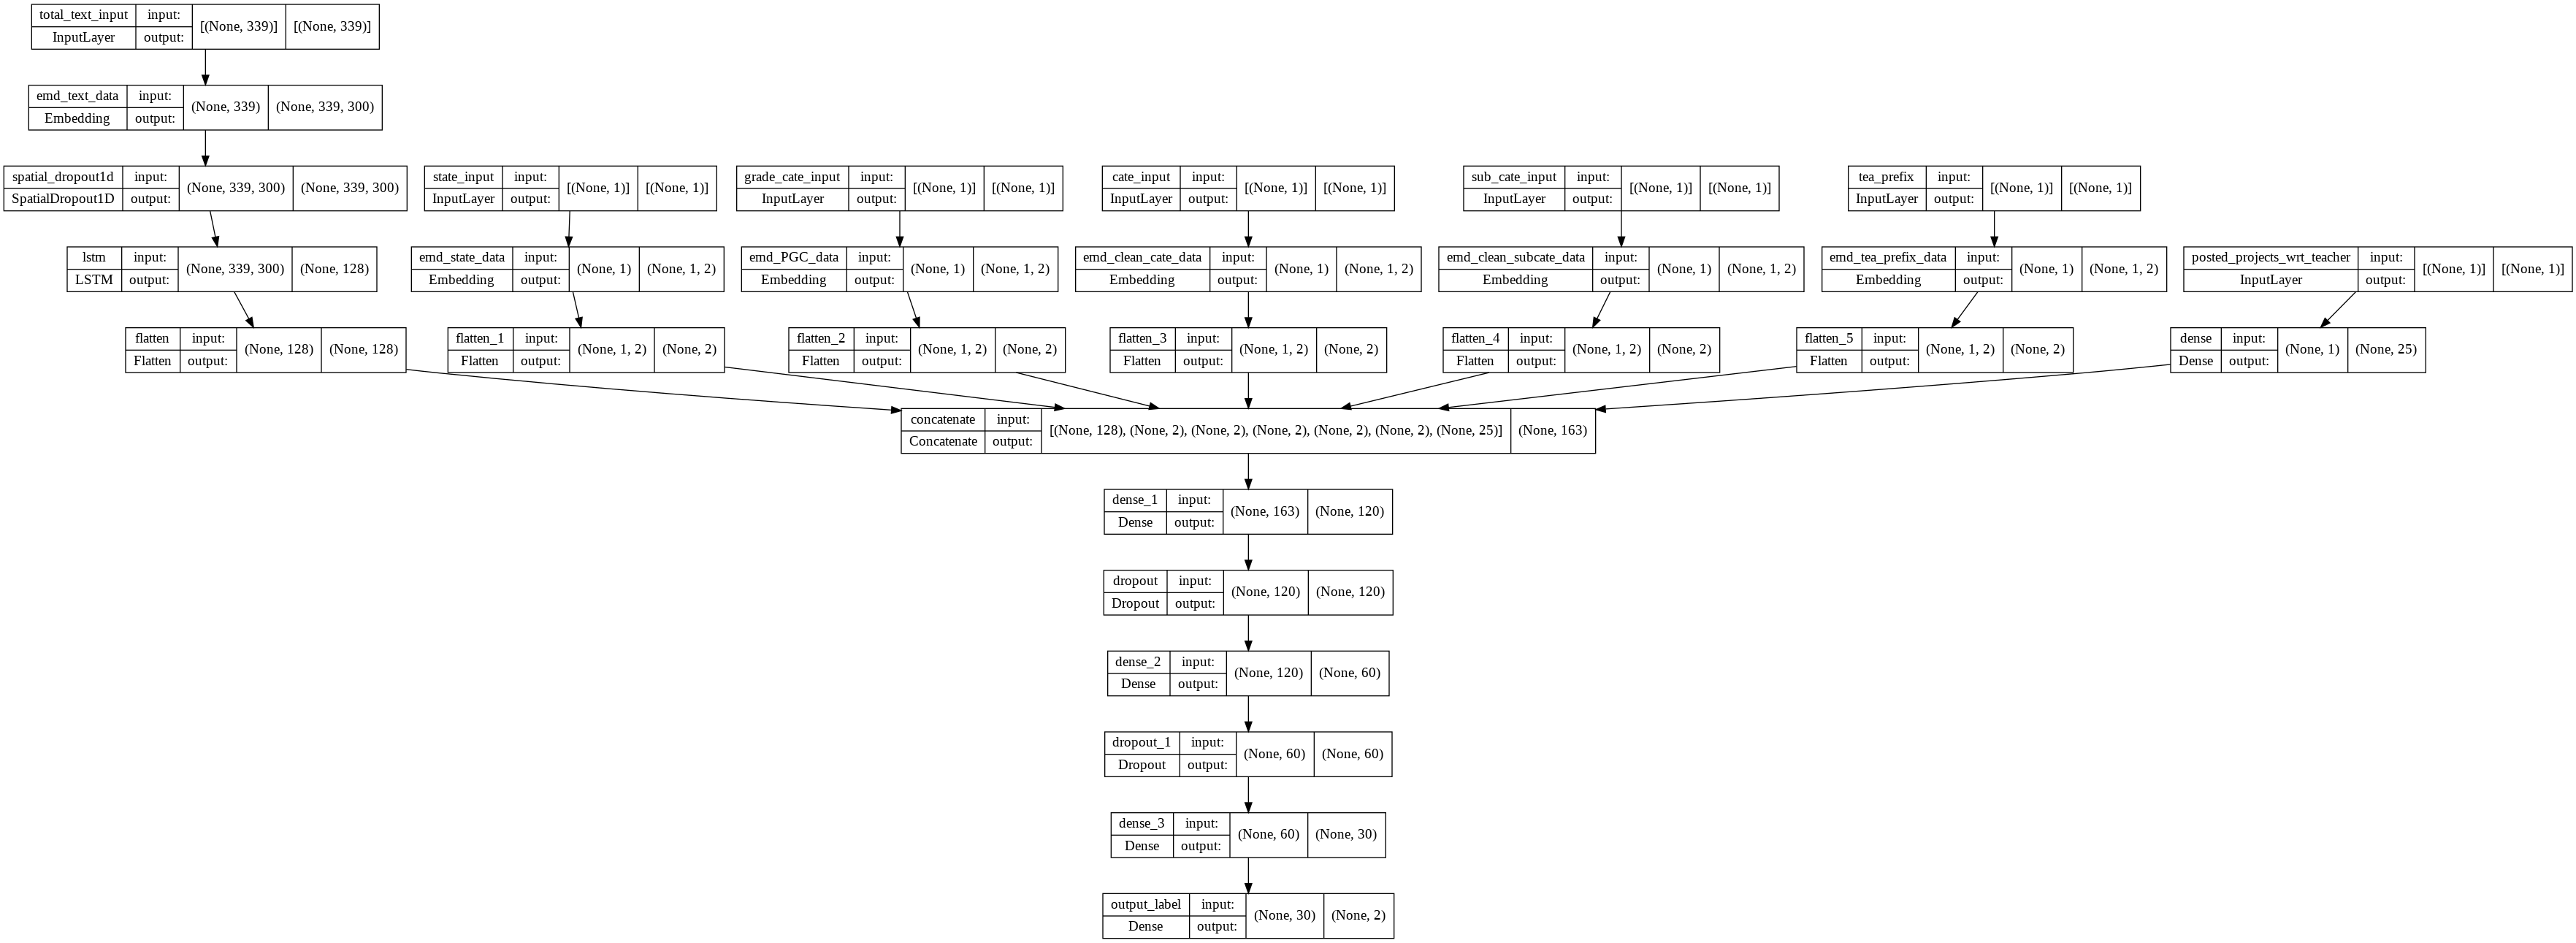

In [ ]:
tf.keras.utils.plot_model(model_1, "multi_input_and_output_model.png", show_shapes=True)


In [ ]:
model_1.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 total_text_input (InputLayer)  [(None, 339)]        0           []                               
                                                                                                  
 emd_text_data (Embedding)      (None, 339, 300)     14215500    ['total_text_input[0][0]']       
                                                                                                  
 spatial_dropout1d (SpatialDrop  (None, 339, 300)    0           ['emd_text_data[0][0]']          
 out1D)                                                                                           
                                                                                                  
 state_input (InputLayer)       [(None, 1)]          0           []                           

## 1.5 Compiling and fititng your model

**auc() through callback**

In [ ]:
#@title
#define custom auc as metric , do not use tf.keras.metrics
# https://stackoverflow.com/a/46844409 - custom AUC reference 1
# https://www.kaggle.com/c/santander-customer-transaction-prediction/discussion/80807  - custom AUC reference 2
# compile and fit your model

In [ ]:
#@title -other ways to init auc




# def auc_1(y_true, y_pred):
#     auc = tf.keras.metrics.AUC(y_true, y_pred)[1]
#     K.get_session().run(tf.local_variables_initializer())
#     return auc
# def auc_2(y_true, y_pred):
#     return tf.compat.v1.py_func(roc_auc_score, (y_true, y_pred), tf.double)

# def aucM_3(true, pred):

#         #We want strictly 1D arrays - cannot have (batch, 1), for instance
#     true= K.flatten(true)
#     pred = K.flatten(pred)

#         #total number of elements in this batch
#     totalCount = K.shape(true)[0]

#         #sorting the prediction values in descending order
#     values, indices = tf.nn.top_k(pred, k = totalCount)   
#         #sorting the ground truth values based on the predictions above         
#     sortedTrue = K.gather(true, indices)

#         #getting the ground negative elements (already sorted above)
#     negatives = 1 - sortedTrue

#         #the true positive count per threshold
#     TPCurve = K.cumsum(sortedTrue)

#         #area under the curve
#     auc = K.sum(TPCurve * negatives)

#        #normalizing the result between 0 and 1
#     totalCount = K.cast(totalCount, K.floatx())
#     positiveCount = K.sum(true)
#     negativeCount = totalCount - positiveCount
#     totalArea = positiveCount * negativeCount
#     return  auc / totalArea



**initilizing auc function**

In [ ]:
def auc( y_true, y_pred ) :
    score = tf.numpy_function( lambda y_true, y_pred : roc_auc_score( y_true, y_pred, average='macro', sample_weight=None).astype('float32'),
                        [y_true, y_pred],
                        'float32',
                        name='sklearnAUC' )
    return score

In [ ]:
# from tensorflow.python.keras.callbacks import TensorBoard
import datetime
%load_ext tensorboard


In [ ]:
model.run_eagerly = True
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard = tf.keras.callbacks.TensorBoard(log_dir=log_dir)



model_1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0006, decay = 1e-4),
              loss="categorical_crossentropy",
              metrics=['accuracy', auc])



In [ ]:
text_padded_cv.shape

(17480, 339)

In [ ]:

filepath="weights/weights_copy_new_23_2.best.hdf5"

earlystopping_1 = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=4, verbose=1)

checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_auc', verbose=1, save_best_only=True, mode='max')

callbacks_list = [checkpoint,tensorboard,earlystopping_1]

# my_callbacks = [tf.keras.callbacks.EarlyStopping(monitor='auc', patience=300, verbose=1, mode='max')]


model_1.fit(
            {"total_text_input": text_padded, 'state_input': column_train_data.state, 
              'grade_cate_input': column_train_data.project_grade_cate, 'cate_input': column_train_data.input_cate,
              'sub_cate_input': column_train_data.input_sub_cate, 'tea_prefix':column_train_data.teacher_pre,
              'posted_projects_wrt_teacher': numerical_data_train.teacher_number_of_previously_posted_projects},
              {'output_label': y_train},
              epochs = 30,
              validation_data = ([text_padded_cv, column_cv_data.state, 
              column_cv_data.project_grade_cate, column_cv_data.input_cate,
              column_cv_data.input_sub_cate, column_cv_data.teacher_pre,
              numerical_data_cv.teacher_number_of_previously_posted_projects],y_cv ),

              batch_size =256, callbacks=callbacks_list, verbose=1,
    )
# after 30 epoch we can see there is more than 75 auc score 


Epoch 1/10
273/274 [============================>.] - ETA: 0s - loss: 0.4012 - accuracy: 0.8471 - auc: 0.7071
Epoch 1: val_auc improved from -inf to 0.71540, saving model to weights/weights_copy_new_23_2.best.hdf5
274/274 [==============================] - 18s 65ms/step - loss: 0.4012 - accuracy: 0.8471 - auc: 0.7075 - val_loss: 0.3824 - val_accuracy: 0.8546 - val_auc: 0.7154
Epoch 2/10
273/274 [============================>.] - ETA: 0s - loss: 0.3898 - accuracy: 0.8480 - auc: 0.7290
Epoch 2: val_auc improved from 0.71540 to 0.73215, saving model to weights/weights_copy_new_23_2.best.hdf5
274/274 [==============================] - 19s 69ms/step - loss: 0.3897 - accuracy: 0.8480 - auc: 0.7294 - val_loss: 0.3775 - val_accuracy: 0.8557 - val_auc: 0.7322
Epoch 3/10
273/274 [============================>.] - ETA: 0s - loss: 0.3839 - accuracy: 0.8493 - auc: 0.7408
Epoch 3: val_auc improved from 0.73215 to 0.73527, saving model to weights/weights_copy_new_23_2.best.hdf5
274/274 [=============

## 1.6 tensorboard 

In [ ]:
# load tensorboard



# <font color='red'> Model-2 </font>

Use the same model as above but for 'input_seq_total_text_data' give only some words in the sentance not all the words. Filter the words as below. 

<pre>
1. Fit TF-IDF vectorizer on the Train data <br>
2. Get the idf value for each word we have in the train data. Please go through <a  href='https://stackoverflow.com/questions/23792781/tf-idf-feature-weights-using-sklearn-feature-extraction-text-tfidfvectorizer'>this</a><br>

3. Do some analysis on the Idf values and based on those values choose the low and high threshold value. Because very 
frequent words and very very rare words don't give much information.
Hint - A preferable IDF range is 2-11 for model 2. <br>
4.Remove the low idf value and high idf value words from the train and test data. You can go through each of the
sentence of train and test data and include only those features(words) which are present in the defined IDF range.
5. Perform tokenization on the modified text data same as you have done for previous model.
6. Create embedding matrix for model 2 and then use the rest of the features similar to previous model.
7. Define the model, compile and fit the model.
</pre>

#### pre_processing for model_2

In [ ]:
# 1. Fit TF-IDF vectorizer on the Train data 

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
vec_essay = vectorizer.fit_transform(X_train.essay)

# 2. Get the idf value for each word we have in the train data.
idf = vectorizer.idf_
idf.size

47347

In [ ]:
vectorizer.get_feature_names()[:10]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['00',
 '000',
 '001',
 '005nannan',
 '00am',
 '00p',
 '00pm',
 '01',
 '010',
 '01075rm']

3. Do some analysis on the Idf values and based on those values choose the low and high threshold value. Because very 
frequent words and very very rare words don't give much information.


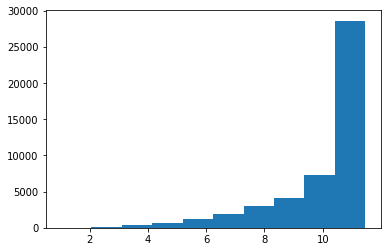

In [ ]:
# most of value are rare 
plt.hist(idf)
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

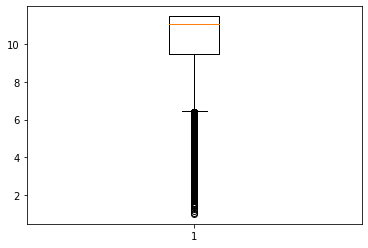

In [ ]:
plt.boxplot(idf)
plt.show

In [ ]:
# removing most frequent and rare word

vectorizer = TfidfVectorizer(min_df = 6, max_df = 11) # hypertune
vec_essay = vectorizer.fit_transform(X_train.essay)

idf = vectorizer.idf_

dict_word_idf = dict(zip(vectorizer.get_feature_names(), idf))

idf.size

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


4366

In [ ]:
len(dict_word_idf)

4366

<function matplotlib.pyplot.show(*args, **kw)>

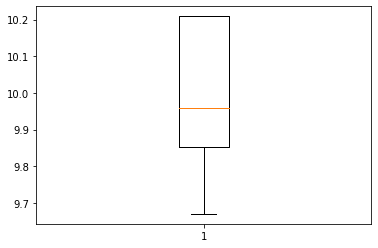

In [ ]:
plt.boxplot(idf)
plt.show

In [ ]:
# 4.Remove the low idf value and high idf value words from the train and test data. You can go through each of the
# sentence of train and test data and include only those features(words) which are present in the defined IDF range.
# X_train.essay
X_train = X_train.reset_index(drop=True)

filtered_essay = []

for i in range(len(X_train.essay)):
    row = X_train.essay[i]
    f_row  = " ".join([x for x in row.split(' ') if x in dict_word_idf.keys()])

    filtered_essay.append(row)
    

In [ ]:
# filtered_essay[0]

In [ ]:

# 5. Perform tokenization on the modified text data same as you have done for previous model.

vocab_size = 50000
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts(filtered_essay)
word_corpus = tokenizer.word_index

# Encode training data sentences into sequences
essay_sequences = tokenizer.texts_to_sequences(filtered_essay)
essay_sequences_cv = tokenizer.texts_to_sequences(X_cv.essay)
essay_sequences_te = tokenizer.texts_to_sequences(X_test.essay)

maxlen = max([len(x) for x in essay_sequences])

# Pad the training sequences
text_padded_2 = pad_sequences(essay_sequences, padding=pad_type, truncating=trunc_type, maxlen=maxlen)
text_padded_2_cv = pad_sequences(essay_sequences_cv, padding=pad_type, truncating=trunc_type, maxlen=maxlen)
text_padded_2_te = pad_sequences(essay_sequences_te, padding=pad_type, truncating=trunc_type, maxlen=maxlen)



In [ ]:
text_padded_2[0].size, len(word_corpus)

(339, 47384)

In [ ]:

# 6. Create embedding matrix for model 2 and then use the rest of the features similar to previous model.



vocab_size = len(tokenizer.word_index)+1 # 51671

# create a weight matrix for words in training docs
embedding_matrix = np.zeros((vocab_size, 300))

for word, i in tokenizer.word_index.items():
    embedding_vector = dict_glove_vectors.get(word)
    
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

        


In [ ]:
embedding_matrix.shape

(47385, 300)


#### 7. Define the model, compile and fit the model.

In [ ]:
# ref for multi input and output: https://keras.io/guides/functional_api/#:~:text=complex%20graph%20topologies-,Models%20with%20multiple%20inputs%20and%20outputs,-The%20functional%20API
tf.keras.backend.clear_session()

total_text_input = Input(shape=(text_padded_2.shape[1],), name="total_text_input")  # Variable-length sequence of ints

state_input = Input(shape=(1,), name="state_input")  # Variable-length sequence of ints
grade_cate_input = Input(shape=(1,), name="grade_cate_input")  # Variable-length sequence of ints
cate_input = Input(shape=(1,), name="cate_input")  # Variable-length sequence of ints
sub_cate_input = Input(shape=(1,), name="sub_cate_input")  # Variable-length sequence of ints
tea_prefix_input = Input(shape=(1,), name="tea_prefix")  # Variable-length sequence of ints
posted_projects_wrt_teacher = Input(shape=(1,), name="posted_projects_wrt_teacher")


# Embed each word into a 300-dimensional vector
vocab_size = len(word_corpus)+1
emd_text_data = layers.Embedding(vocab_size, 300, weights=[embedding_matrix],
                                  input_length=text_padded_2.shape[1], trainable=False, name='emd_text_data')(total_text_input)

# Embed each word into a 2-dimensional vector
vocab_size = column_train_data.state.unique().size+1
emd_state_data = layers.Embedding(vocab_size, 2, input_length = 1, name= 'emd_state_data')(state_input)

vocab_size = column_train_data.project_grade_cate.unique().size+1
emd_PGC_data = layers.Embedding(vocab_size, 2, input_length = 1, name= 'emd_PGC_data')(grade_cate_input)

vocab_size = column_train_data.input_cate.unique().size+1
emd_clean_cate_data = layers.Embedding(vocab_size, 2, input_length = 1, name= 'emd_clean_cate_data')(cate_input)

vocab_size = column_train_data.input_sub_cate.unique().size+1
emd_clean_subcate_data = layers.Embedding(vocab_size, 2, input_length = 1, name= 'emd_clean_subcate_data')(sub_cate_input)

vocab_size = column_train_data.teacher_pre.unique().size+1
emd_tea_prefix_data = layers.Embedding(vocab_size, 2, input_length = 1, name= 'emd_tea_prefix_data')(tea_prefix_input)


# Reduce sequence of embedded words in the title into a single 128-dimensional vector
lstm = layers.LSTM(128)(emd_text_data)



# flatten
flaten_0 = Flatten()(lstm) 
flaten_1 = Flatten()(emd_state_data) 
flaten_2 = Flatten()(emd_PGC_data) 
flaten_3 = Flatten()(emd_clean_cate_data) 
flaten_4 = Flatten()(emd_clean_subcate_data) 
flaten_5 = Flatten()(emd_tea_prefix_data) 

# dense
dense_for_rme_input = Dense(25,)(posted_projects_wrt_teacher)

# Merge all available features into a single large vector via concatenation
x = layers.concatenate([flaten_0, flaten_1, flaten_2, flaten_3, flaten_4, flaten_5, dense_for_rme_input])

dense_after_conv = Dense(120)(x)

dropout_1 = Dropout(0.5)(dense_after_conv)

dense_2 = Dense(60)(dropout_1)

dropout_2 = Dropout(0.5)(dense_2)

dense_2 = Dense(30)(dropout_2)
 
output_layer = Dense(2, activation = 'softmax', name= 'output_label')(dense_2)

model_2 = Model(inputs = [total_text_input,state_input, grade_cate_input, cate_input, sub_cate_input
                               , tea_prefix_input, posted_projects_wrt_teacher ], 
                    outputs = [output_layer])


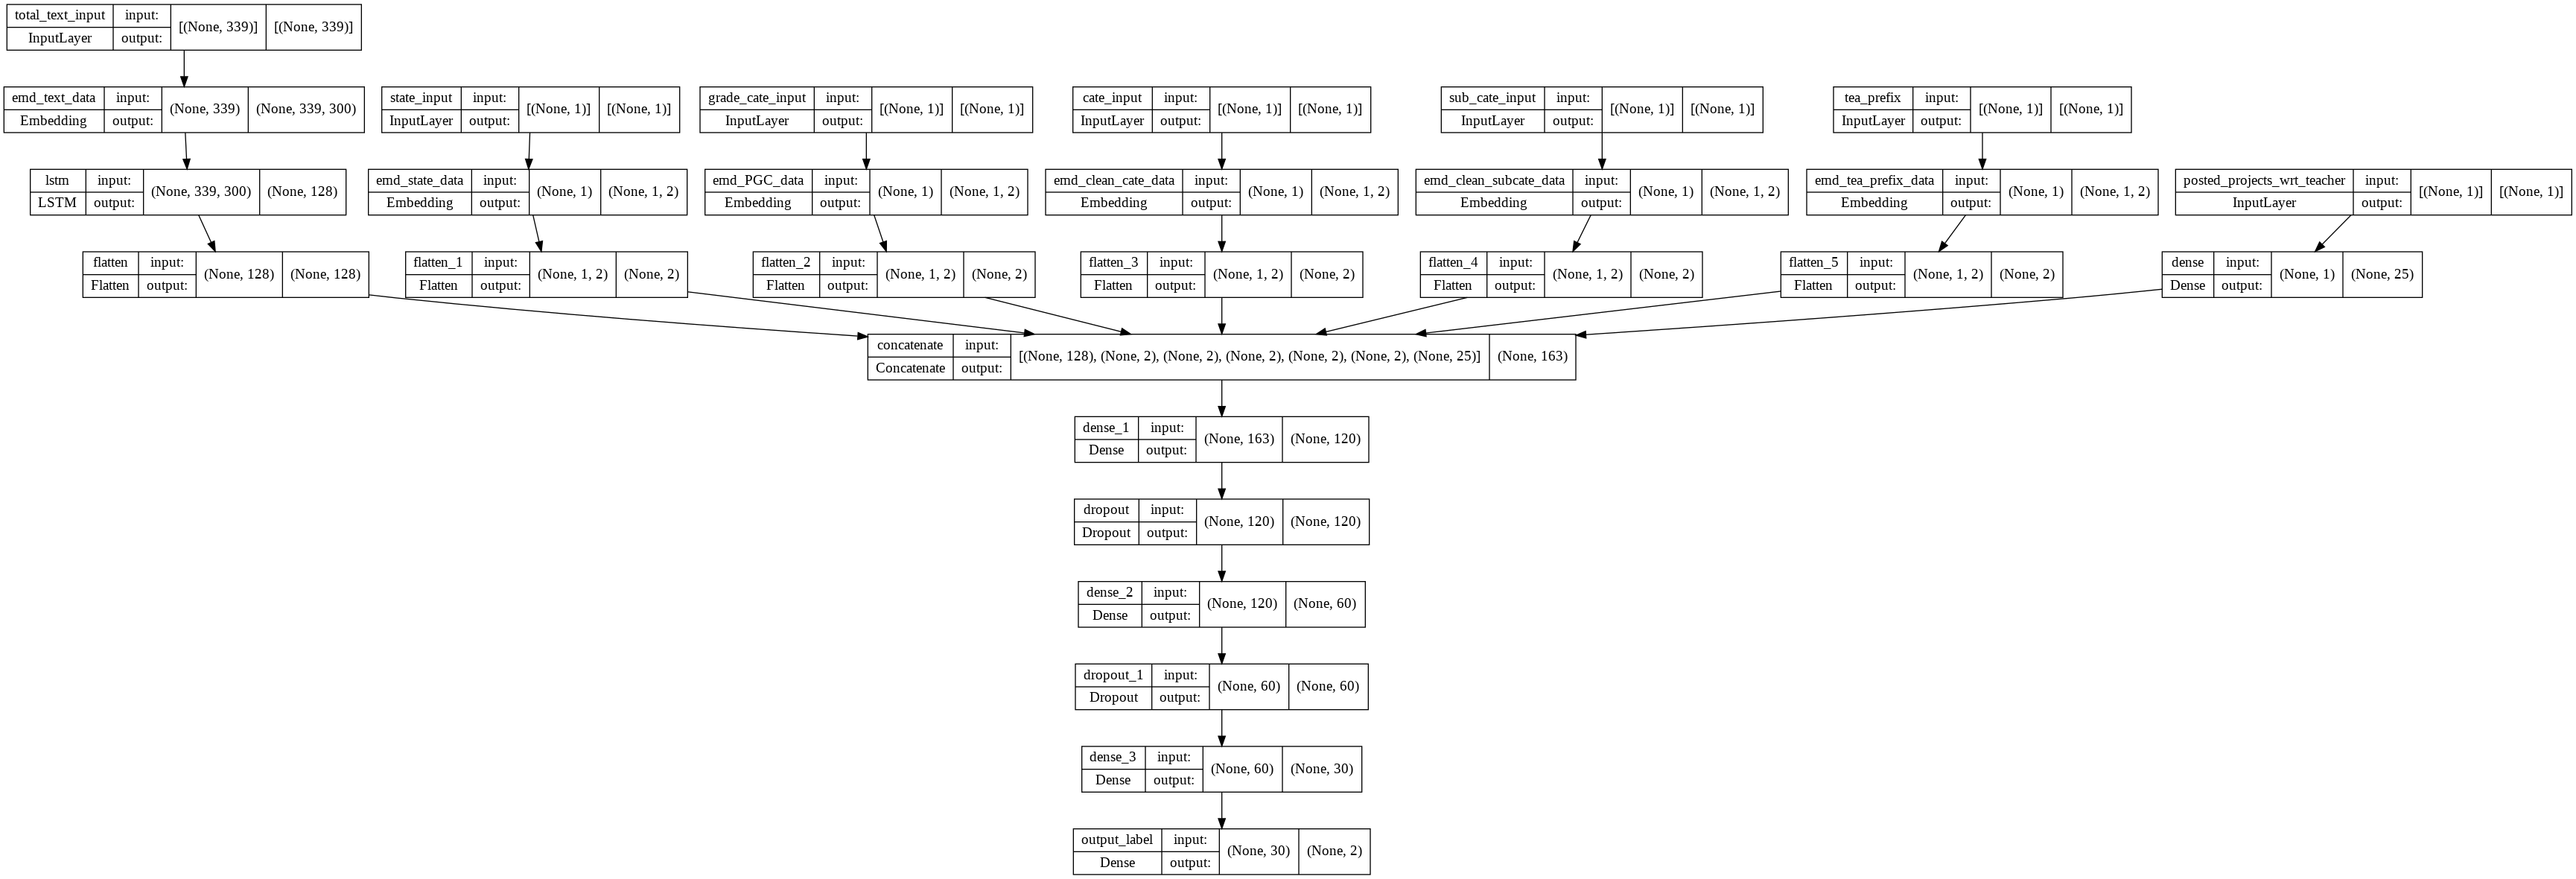

In [ ]:
tf.keras.utils.plot_model(model_2, "multi_input_and_output_model.png", show_shapes=True)


In [ ]:
model_2.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 total_text_input (InputLayer)  [(None, 339)]        0           []                               
                                                                                                  
 emd_text_data (Embedding)      (None, 339, 300)     14215500    ['total_text_input[0][0]']       
                                                                                                  
 state_input (InputLayer)       [(None, 1)]          0           []                               
                                                                                                  
 grade_cate_input (InputLayer)  [(None, 1)]          0           []                               
                                                                                              

### compile and fit

In [ ]:
model_2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss="categorical_crossentropy",
              metrics=['accuracy', auc])

my_callbacks = [tf.keras.callbacks.EarlyStopping(monitor='auc', patience=300, verbose=1, mode='max')]



In [ ]:
model.run_eagerly = True
log_dir = "logs/fit_2/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard = tf.keras.callbacks.TensorBoard(log_dir=log_dir)


filepath="weights/weights_copy_model_2.best.hdf5"

earlystopping_1 = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=4, verbose=1)

checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_auc', verbose=1, save_best_only=True, mode='max')

callbacks_list = [checkpoint,tensorboard,earlystopping_1]


model_2.fit(
            {"total_text_input": text_padded_2, 'state_input': column_train_data.state, 
              'grade_cate_input': column_train_data.project_grade_cate, 'cate_input': column_train_data.input_cate,
              'sub_cate_input': column_train_data.input_sub_cate, 'tea_prefix':column_train_data.teacher_pre,
              'posted_projects_wrt_teacher': numerical_data_train.teacher_number_of_previously_posted_projects},
              {'output_label': y_train},
              epochs = 20,
              validation_data = ([text_padded_2_cv, column_cv_data.state, 
              column_cv_data.project_grade_cate, column_cv_data.input_cate,
              column_cv_data.input_sub_cate, column_cv_data.teacher_pre,
              numerical_data_cv.teacher_number_of_previously_posted_projects],y_cv ),
            
              batch_size =252, callbacks=callbacks_list, verbose=1,
    )
# 20 epoch gives more than  .73 auc score for val_x 

Epoch 1/15
277/278 [============================>.] - ETA: 0s - loss: 0.3768 - accuracy: 0.8495 - auc: 0.7399
Epoch 1: val_auc improved from -inf to 0.73368, saving model to weights/weights_copy_model_2.best.hdf5
278/278 [==============================] - 18s 65ms/step - loss: 0.3768 - accuracy: 0.8495 - auc: 0.7402 - val_loss: 0.3734 - val_accuracy: 0.8443 - val_auc: 0.7337
Epoch 2/15
277/278 [============================>.] - ETA: 0s - loss: 0.3676 - accuracy: 0.8521 - auc: 0.7567
Epoch 2: val_auc improved from 0.73368 to 0.74473, saving model to weights/weights_copy_model_2.best.hdf5
278/278 [==============================] - 18s 65ms/step - loss: 0.3675 - accuracy: 0.8521 - auc: 0.7565 - val_loss: 0.3639 - val_accuracy: 0.8528 - val_auc: 0.7447
Epoch 3/15
277/278 [============================>.] - ETA: 0s - loss: 0.3579 - accuracy: 0.8549 - auc: 0.7728
Epoch 3: val_auc improved from 0.74473 to 0.74771, saving model to weights/weights_copy_model_2.best.hdf5
278/278 [================

# <font color='red'> Model-3 </font>

<img src='https://i.imgur.com/fkQ8nGo.png'>
ref: https://i.imgur.com/fkQ8nGo.png

In [ ]:
#in this model you can use the text vectorized data from model1 
#for other than text data consider the following steps
# you have to perform one hot encoding of categorical features. You can use onehotencoder() or countvectorizer() for the same.
# Stack up standardised numerical features and all the one hot encoded categorical features
#the input to conv1d layer is 3d, you can convert your 2d data to 3d using np.newaxis
# Note - deep learning models won't work with sparse features, you have to convert them to dense features before fitting in the model.

### 3.1 **pre-processing for model_3**

In [ ]:
price = x_tr_df[['price']]
teacher_posted_projects = x_tr_df[['teacher_number_of_previously_posted_projects']]

price_te = x_te_df[['price']]
teacher_posted_projects_te = x_te_df[['teacher_number_of_previously_posted_projects']]


x_tr_df.head()

,state,project_grade_cate,input_cate,teacher_pre,input_sub_cate,teacher_number_of_previously_posted_projects,price
0,26,4,47,3,378,-0.327464,0.045019
1,2,3,9,3,259,-0.042189,6.710484
2,5,4,9,2,278,-0.363123,-0.563569
3,9,4,25,2,307,-0.291804,-0.653984
4,4,4,49,2,380,-0.363123,0.288135


In [ ]:
X_train.head(1)

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,clean_categories,clean_subcategories,essay,price
0,ct,ms,grades_prek_2,2,specialneeds,specialneeds,my school urban district materials bought pock...,313.22


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer

encode = OneHotEncoder(handle_unknown= 'ignore', sparse= False)
encode.fit(X_train[['project_grade_category']])
project_grade_cate_tr = encode.transform(X_train[['project_grade_category']])
project_grade_cate_te = encode.transform(X_test[['project_grade_category']])

encode = OneHotEncoder(handle_unknown= 'ignore', sparse= False)
encode.fit(X_train[['school_state']])
school_state = encode.transform(X_train[['school_state']])
school_state_te = encode.transform(X_test[['school_state']])

encode = OneHotEncoder(handle_unknown= 'ignore', sparse= False)
encode.fit(X_train[['teacher_prefix']])
teacher_prefix = encode.transform(X_train[['teacher_prefix']])
teacher_prefix_te = encode.transform(X_test[['teacher_prefix']])


In [ ]:
X_train[["clean_categories"]].values

array([['specialneeds'],
       ['health_sports'],
       ['health_sports'],
       ...,
       ['specialneeds'],
       ['literacy_language math_science'],
       ['literacy_language']], dtype=object)

In [ ]:
# One hot encoding of Categorical Feature: clean_categories 

encode = OneHotEncoder(handle_unknown= 'ignore', sparse= False)
encode.fit(X_train[['clean_categories']])
clean_categories = encode.transform(X_train[['clean_categories']])
clean_categories_te = encode.transform(X_test[['clean_categories']])

clean_categories.shape

(69918, 51)

In [ ]:
clean_categories[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
# One hot encoding of categorical Feature: clean_subcategories 

encode = OneHotEncoder(handle_unknown= 'ignore', sparse= False)
encode.fit(X_train[['clean_subcategories']])
clean_subcategories = encode.transform(X_train[['clean_subcategories']])
clean_subcategories_te = encode.transform(X_test[['clean_subcategories']])




# school_state, teacher_prefix, teacher_number_of_previously_posted_projects, project_grade_cate_tr, clean_categories, clean_subcategories, 
school_state.shape, teacher_prefix.shape, project_grade_cate_tr.shape, clean_categories.shape, clean_subcategories.shape


((69918, 51), (69918, 5), (69918, 4), (69918, 51), (69918, 386))

In [ ]:
x_tr = np.hstack([school_state, teacher_prefix,
                  project_grade_cate_tr, clean_categories, clean_subcategories, price, teacher_posted_projects])

x_te = np.hstack([school_state_te, teacher_prefix_te,
                  project_grade_cate_te, clean_categories_te, clean_subcategories_te, price_te, teacher_posted_projects_te])

x_tr.shape, x_te.shape, y_train.shape, y_test.shape

((69918, 499), (21850, 499), (69918, 2), (21850, 2))

In [ ]:
#the input to conv1d layer is 3d, you can convert your 2d data to 3d using np.newaxis
if x_tr.ndim == 2:
    x_tr = np.reshape(x_tr, (x_tr.shape[0],x_tr.shape[1],1))
    # y_train = y_train.values.reshape((-1,1))

if x_te.ndim == 2:
    x_te = np.reshape(x_te, (x_te.shape[0],x_te.shape[1],1))
    # y_train = y_train.values.reshape((-1,1))
        
x_tr.shape, x_te.shape, y_train.shape , x_tr.ndim

((69918, 499, 1), (21850, 499, 1), (69918, 2), 3)

####  handle sparse matrix 

there are two possible approaches:

1. not working - Keep it as a scipy sparse matrix, then, when giving Keras a minibatch, make it dense
2. Keep it sparse all the way through, and use Tensorflow Sparse Tensors

we will go with 2 option as we assume it will give more accuracy 




In [ ]:
from scipy import sparse

# temp_df = sparse.csr_matrix(x_tr)


####  handling  imbalance dataset
after some reseach i got 2 way for this problem
1. **not working** - initilize bias to the output layer with initial weight which is calculated 
    by refer: https://www.tensorflow.org/tutorials/structured_data/imbalanced_data#define_the_model_and_metrics

code: output_bias = np.log([pos/neg]) 
![image.png](attachment:image.png)

2. **not tried** - upsampling or downsampling

In [ ]:
# model will take care of it
pos = y_train[y_train==1].size
neg = y_train[y_train==0].size

pos, neg

(139836, 139836)

### 3.2 Defining model

In [ ]:
tf.keras.backend.clear_session()

n_feature = x_tr.shape[1]
input_shape = (n_feature, 1,1 )

total_text_input = Input(shape=(text_padded.shape[1]), name="total_text_input")  # Variable-length sequence of ints

# Embed each word into a 300-dimensional vector
vocab_size = len(word_corpus)+1
emd_text_data = layers.Embedding(vocab_size, 300, weights=[embedding_matrix],
                                  input_length=text_padded.shape[1], trainable=False, name='emd_text_data')(total_text_input)
# Reduce sequence of embedded words in the title into a single 128-dimensional vector
lstm = layers.LSTM(128)(emd_text_data)



otherthan_text_data = Input( shape= input_shape, name='otherthan_text_data')

#conve for otherthan_text_data
conv1d_1 = layers.Conv1D(3,3, padding='same', activation = 'relu',input_shape=input_shape, name = 'convd1')(otherthan_text_data)
conv1d_2 = layers.Conv1D(3,3, padding='same', activation = 'relu',input_shape=input_shape, name = 'convd2')(conv1d_1)
# flattening 
flatten_1 = Flatten()(conv1d_2)



# cacatenating 2 outputs
concatenate = layers.concatenate([lstm, flatten_1])

dense_layer1_after_concat = Dense(256, name = "dense_layer1_after_concat")(concatenate)

dropout_1 = layers.Dropout(0.5)(dense_layer1_after_concat)

dense_layer2_after_concat = Dense(164 , name = "dense_layer2_after_concat")(dropout_1)

dropout_2 = layers.Dropout(0.4)(dense_layer2_after_concat)

dense_layern_after_concat = Dense(112, name="dense_layern_after_concat")(dropout_2)

x = Flatten()(dense_layern_after_concat)

output_layer_classify_with_softmax = Dense(2, activation="softmax", name="output_label")(x)

model_3 = Model(inputs = [total_text_input,otherthan_text_data], outputs= [output_layer_classify_with_softmax])


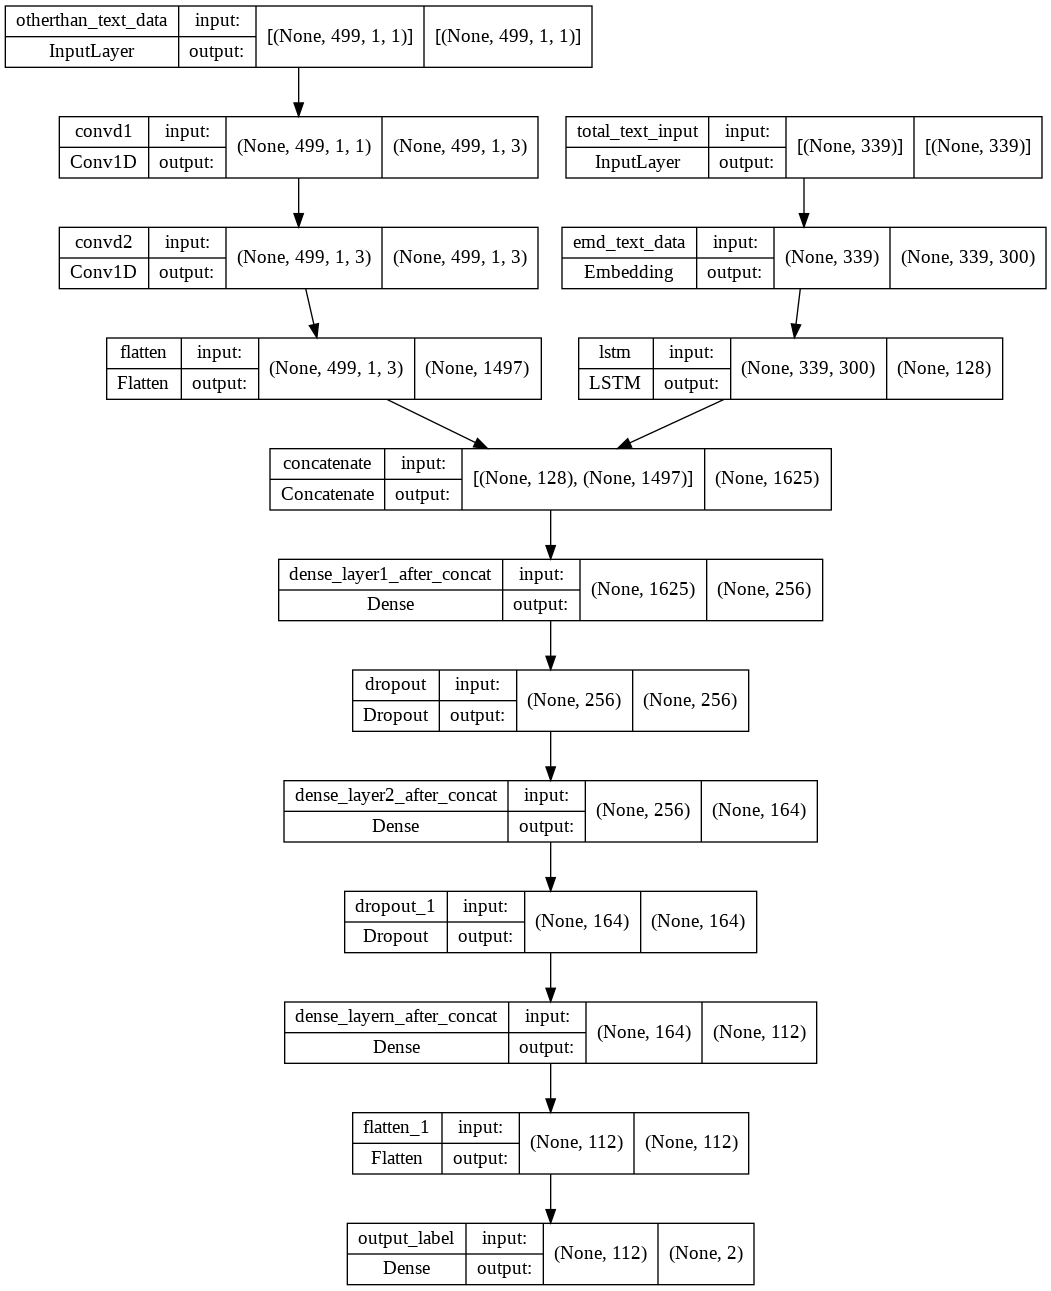

In [ ]:
tf.keras.utils.plot_model(model_3, "multi_input_and_output_model.png", show_shapes=True)


In [ ]:
model_3.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 otherthan_text_data (InputLaye  [(None, 499, 1, 1)]  0          []                               
 r)                                                                                               
                                                                                                  
 total_text_input (InputLayer)  [(None, 339)]        0           []                               
                                                                                                  
 convd1 (Conv1D)                (None, 499, 1, 3)    12          ['otherthan_text_data[0][0]']    
                                                                                                  
 emd_text_data (Embedding)      (None, 339, 300)     14215500    ['total_text_input[0][0]']   

### 3.3 **compile and fit**
note - auc is contant - changing activation from softmax to sigmoid improve auc litle,  

In [ ]:
model_3.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0001,decay = 1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy', auc])



/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
model.run_eagerly = True
log_dir = "logs/fit_3/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard = tf.keras.callbacks.TensorBoard(log_dir=log_dir)


filepath="weights/weights_copy_model_3.best.hdf5"

earlystopping_1 = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, verbose=1)

checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_auc', verbose=1, save_best_only=True, mode='max')

callbacks_list = [checkpoint,tensorboard,earlystopping_1]

model_3.fit(
            {"total_text_input": text_padded, "otherthan_text_data": x_tr},
              {'output_label': y_train},
              epochs = 20,
              batch_size =256, 
              validation_data = ([text_padded_te,x_te],y_test),
              callbacks=callbacks_list, verbose=1,
    )


Epoch 1/10
273/274 [============================>.] - ETA: 0s - loss: 0.4207 - accuracy: 0.8473 - auc: 0.5909
Epoch 1: val_auc improved from -inf to 0.59676, saving model to weights/weights_copy_model_3.best.hdf5
274/274 [==============================] - 17s 63ms/step - loss: 0.4208 - accuracy: 0.8473 - auc: 0.5913 - val_loss: 0.4196 - val_accuracy: 0.8484 - val_auc: 0.5968
Epoch 2/10
273/274 [============================>.] - ETA: 0s - loss: 0.4204 - accuracy: 0.8472 - auc: 0.5955
Epoch 2: val_auc improved from 0.59676 to 0.59676, saving model to weights/weights_copy_model_3.best.hdf5
274/274 [==============================] - 18s 66ms/step - loss: 0.4204 - accuracy: 0.8472 - auc: 0.5959 - val_loss: 0.4191 - val_accuracy: 0.8483 - val_auc: 0.5968
Epoch 3/10
273/274 [============================>.] - ETA: 0s - loss: 0.4202 - accuracy: 0.8472 - auc: 0.5955
Epoch 3: val_auc did not improve from 0.59676
274/274 [==============================] - 18s 65ms/step - loss: 0.4202 - accuracy: 0

In [ ]:
x_te.shape, text_padded_te.shape

((21850, 499, 1), (21850, 339))